## **Question** 
- Product Segmentation: Can we cluster products based on price, ratings, and sales to identify distinct product categories or trends?

## LIBRARIES

In [20]:
import pandas as pd
import numpy as np

# K-Means Clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# DBSCAN - Density-Based Spatial Clustering of Applications with Noise 
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score

import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Dataset path
DATA_PATH = './Data/Data.csv'

# Keyword 
KEYWORD = []

In [22]:
df = pd.read_csv(DATA_PATH)

In [23]:
# Select relevant features
features = ['Giá', 'Lượt đánh giá', 'Số lượng đã bán']
data = df[features]

# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

## **USING KMEANS CLUSTERING**

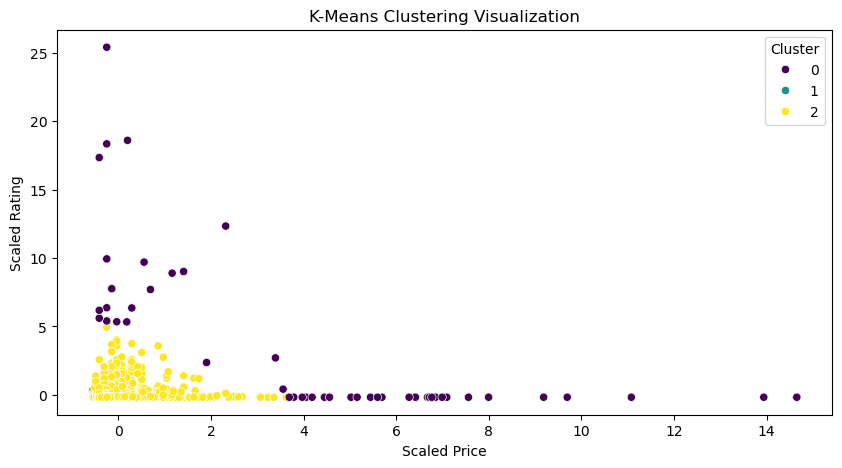

Clustered data saved to "clustered_products.csv"


In [24]:
# Find the optimal number of clusters using the elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Apply K-Means clustering with the chosen number of clusters (e.g., 3)
optimal_k = 3  # Choose the number of clusters based on the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
df['Cluster'] = kmeans.fit_predict(data_scaled)

# Visualize the elbow method
plt.figure(figsize=(10, 5))
sns.scatterplot(
    x=data_scaled[:, 0], y=data_scaled[:, 1], 
    hue=df['Cluster'], palette='viridis'
)
plt.title('K-Means Clustering Visualization')
plt.xlabel('Scaled Price')
plt.ylabel('Scaled Rating')
plt.legend(title='Cluster')
plt.show()

# Save the clustered data
df.to_csv('./Data/clustered_products.csv', index=False)
print('Clustered data saved to "clustered_products.csv"')


In [25]:
clustered_data_new = pd.read_csv('./Data/clustered_products.csv')

cluster_0 = clustered_data_new[clustered_data_new['Cluster'] == 0]
cluster_1 = clustered_data_new[clustered_data_new['Cluster'] == 1]
cluster_2 = clustered_data_new[clustered_data_new['Cluster'] == 2]

print(cluster_0.describe())
print(cluster_1.describe())
print(cluster_2.describe())

                Giá  Lượt đánh giá  Điểm đánh giá trung bình  Số lượng đã bán  \
count  5.400000e+01      54.000000                 54.000000        54.000000   
mean   4.877124e+06     732.296296                  1.944259         0.074074   
std    3.970680e+06    1205.462138                  2.370917         0.544331   
min    1.460000e+05       0.000000                  0.000000         0.000000   
25%    1.056250e+06       0.000000                  0.000000         0.000000   
50%    4.610000e+06       0.000000                  0.000000         0.000000   
75%    6.736345e+06    1260.750000                  4.800000         0.000000   
max    1.381996e+07    5194.000000                  5.000000         4.000000   

             Fit  Cluster  
count  54.000000     54.0  
mean    0.677593      0.0  
std     1.279904      0.0  
min     0.000000      0.0  
25%     0.000000      0.0  
50%     0.000000      0.0  
75%     0.000000      0.0  
max     3.170000      0.0  
                 G

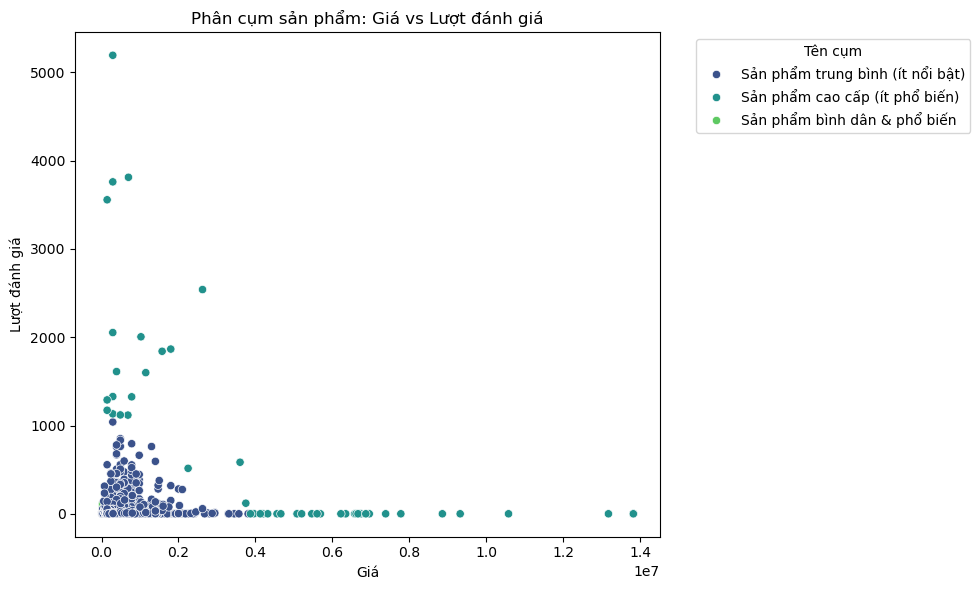

In [26]:
# Step 1: Assign meaningful names to clusters
cluster_names = {
    0: "Sản phẩm cao cấp (ít phổ biến)",
    1: "Sản phẩm bình dân & phổ biến",
    2: "Sản phẩm trung bình (ít nổi bật)"
}
clustered_data_new['Cluster Name'] = clustered_data_new['Cluster'].map(cluster_names)

# Save updated DataFrame with cluster names
output_path = './Data/clustered_products_with_names.csv'
clustered_data_new.to_csv(output_path, index=False)

# Step 2: Visualize clusters in 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=clustered_data_new['Giá'], y=clustered_data_new['Lượt đánh giá'],
    hue=clustered_data_new['Cluster Name'], palette='viridis'
)
plt.title('Phân cụm sản phẩm: Giá vs Lượt đánh giá')
plt.xlabel('Giá')
plt.ylabel('Lượt đánh giá')
plt.legend(title='Tên cụm', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


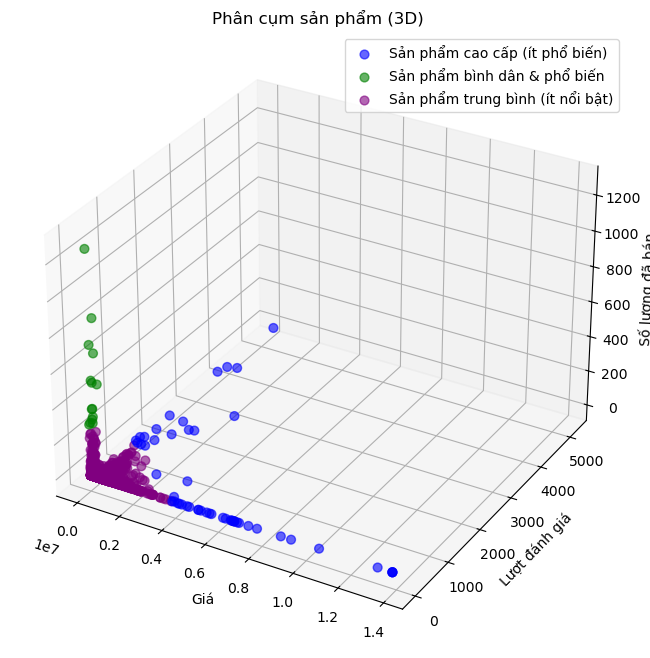

In [27]:
# Step 3: Visualize clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
colors = {'Sản phẩm cao cấp (ít phổ biến)': 'blue',
          'Sản phẩm bình dân & phổ biến': 'green',
          'Sản phẩm trung bình (ít nổi bật)': 'purple'}

for name, color in colors.items():
    subset = clustered_data_new[clustered_data_new['Cluster Name'] == name]
    ax.scatter(
        subset['Giá'], subset['Lượt đánh giá'], subset['Số lượng đã bán'],
        label=name, alpha=0.6, s=40, color=color
    )

ax.set_title('Phân cụm sản phẩm (3D)')
ax.set_xlabel('Giá')
ax.set_ylabel('Lượt đánh giá')
ax.set_zlabel('Số lượng đã bán')
ax.legend()
plt.show()

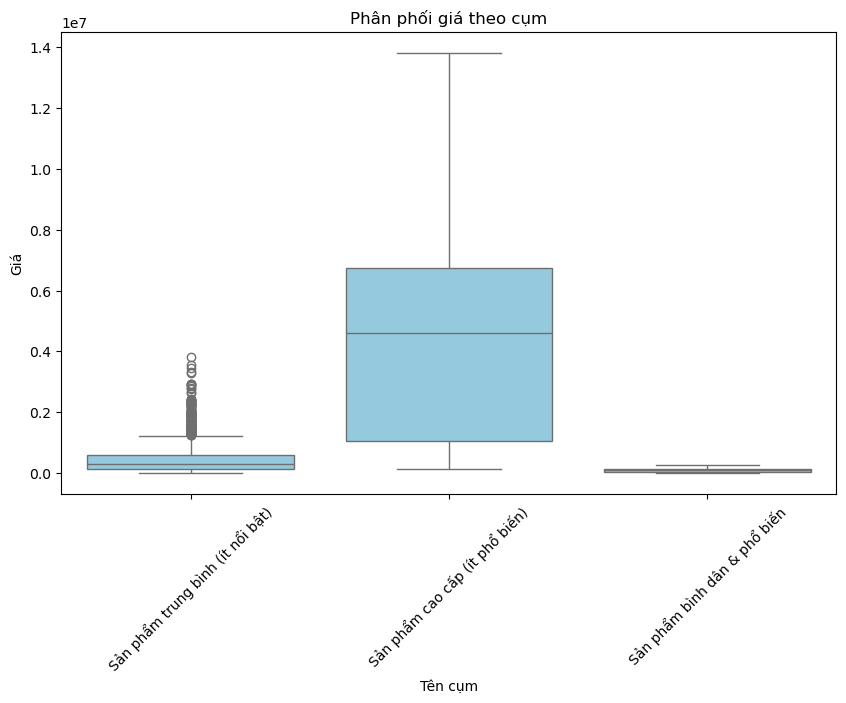

In [28]:
# Boxplot of prices by cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster Name', y='Giá', data=clustered_data_new, color='skyblue')
plt.title('Phân phối giá theo cụm')
plt.xlabel('Tên cụm')
plt.ylabel('Giá')
plt.xticks(rotation=45)
plt.show()


In [29]:
# Step 4: Identify actionable groups
# Find best-sellers and highly-rated products
best_sellers = clustered_data_new[clustered_data_new['Số lượng đã bán'] > 50]
highly_rated = clustered_data_new[clustered_data_new['Lượt đánh giá'] > 100]

# Display actionable subsets
print("Sản phẩm bán chạy (Best Sellers):")
print(best_sellers[['Tên sản phẩm', 'Giá', 'Cluster Name', 'Số lượng đã bán']].head())

print("\nSản phẩm được đánh giá cao (Highly Rated Products):")
print(highly_rated[['Tên sản phẩm', 'Giá', 'Cluster Name', 'Lượt đánh giá']].head())

Sản phẩm bán chạy (Best Sellers):
                                          Tên sản phẩm       Giá  \
15      Đầm xòe nhún vai kết hạt trai thời trang a b c   99000.0   
130  váy trễ vai trắng tay bồng dáng dài, đầm trễ v...   90000.0   
436  váy trễ vai trắng tay bồng dáng dài, đầm trễ v...   80000.0   
438                   Đầm xòe đỏ kết hoa trắng-MS0605D  190000.0   
441  váy trễ vai trắng tay bồng dáng dài, đầm trễ v...   85000.0   

                         Cluster Name  Số lượng đã bán  
15   Sản phẩm trung bình (ít nổi bật)             67.0  
130  Sản phẩm trung bình (ít nổi bật)            124.0  
436  Sản phẩm trung bình (ít nổi bật)            135.0  
438  Sản phẩm trung bình (ít nổi bật)             78.0  
441  Sản phẩm trung bình (ít nổi bật)             51.0  

Sản phẩm được đánh giá cao (Highly Rated Products):
                                           Tên sản phẩm       Giá  \
673                       Balo Thời Trang PRAZA - BL172  149000.0   
806                Balo 

### **Handling Noise Data**

In [30]:
# Load the dataset
file_path = './Data/clustered_products_with_names.csv'
clustered_data = pd.read_csv(file_path)

# Function to remove outliers based on IQR
def remove_outliers(df, column):
    # Calculate IQR
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1

    # Define lower and upper bounds
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Filter out outliers
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    outliers_df = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    return filtered_df, outliers_df

# Remove outliers for each cluster and each feature
filtered_data = pd.DataFrame()
outliers_data = pd.DataFrame()

for cluster_name in clustered_data['Cluster Name'].unique():
    cluster = clustered_data[clustered_data['Cluster Name'] == cluster_name]
    for feature in ['Giá', 'Lượt đánh giá', 'Số lượng đã bán']:
        filtered_cluster, outliers_cluster = remove_outliers(cluster, feature)
        cluster = filtered_cluster  # Update cluster after removing outliers for this feature
        outliers_data = pd.concat([outliers_data, outliers_cluster])
    filtered_data = pd.concat([filtered_data, cluster])

# Save the filtered data
filtered_data_path = './Data/filtered_clustered_products.csv'
filtered_data.to_csv(filtered_data_path, index=False)

# Save the outliers separately for reference
outliers_data_path = './Data/outliers_data.csv'
outliers_data.to_csv(outliers_data_path, index=False)

# Output results
print("Filtered data saved to:", filtered_data_path)
print("Outliers saved to:", outliers_data_path)


Filtered data saved to: ./Data/filtered_clustered_products.csv
Outliers saved to: ./Data/outliers_data.csv


### **Reclustering KMEANS after handling noise**

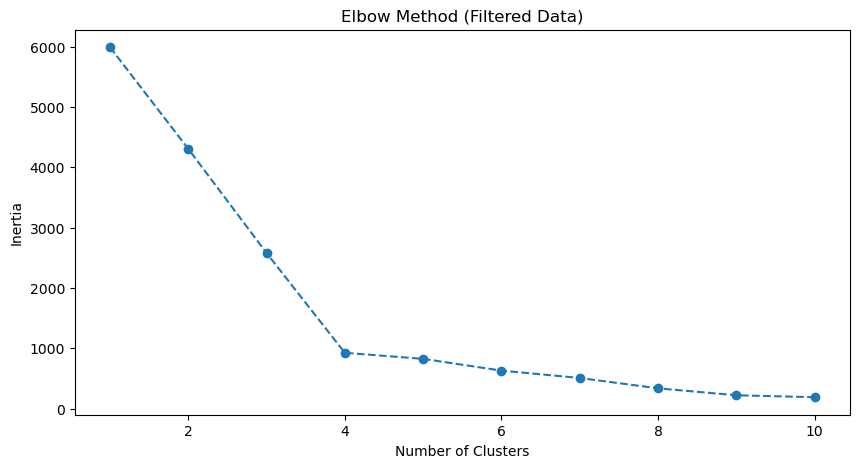

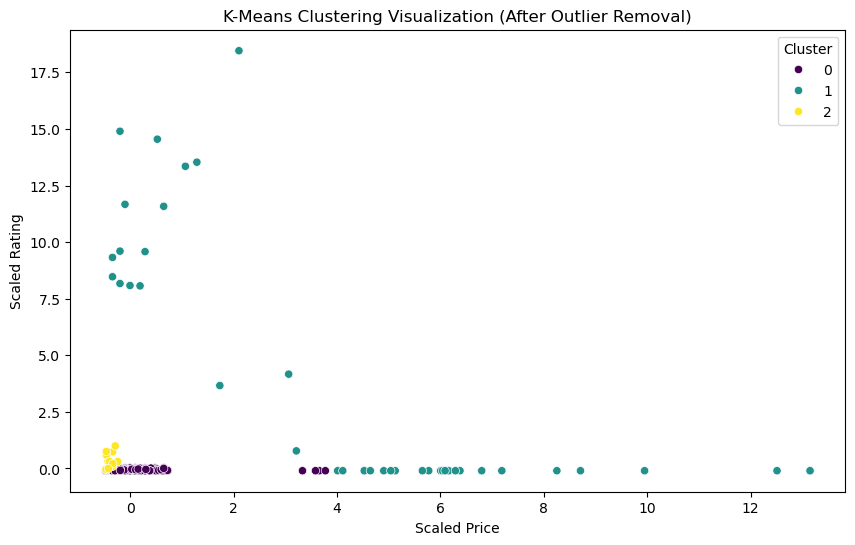

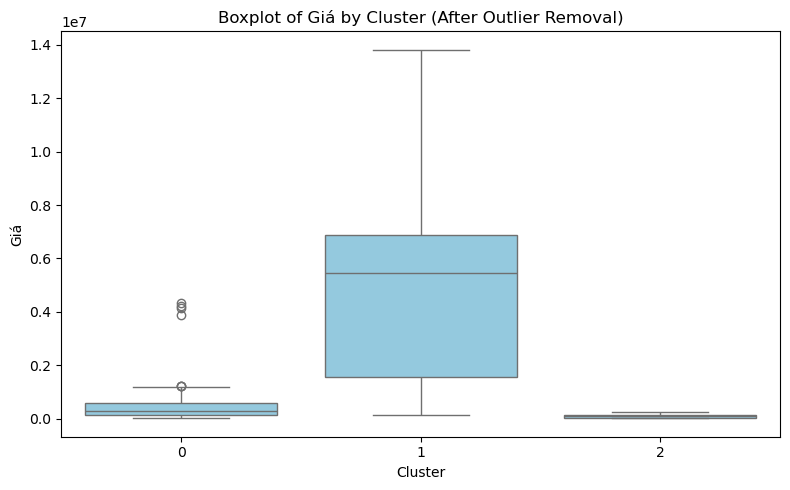

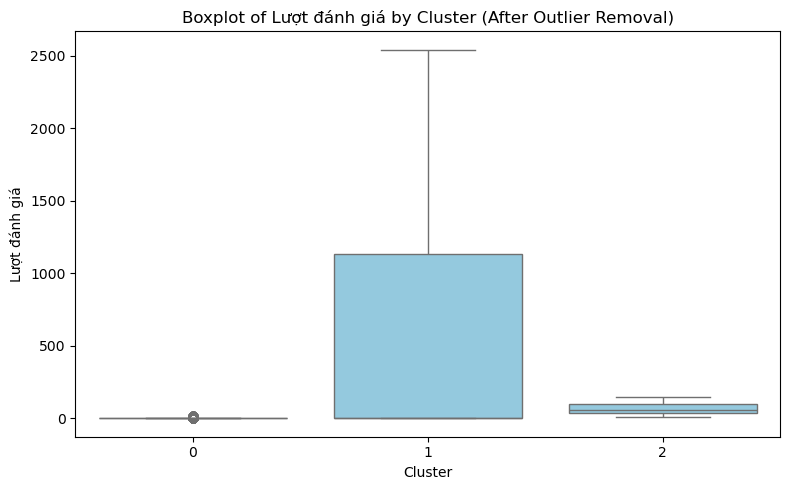

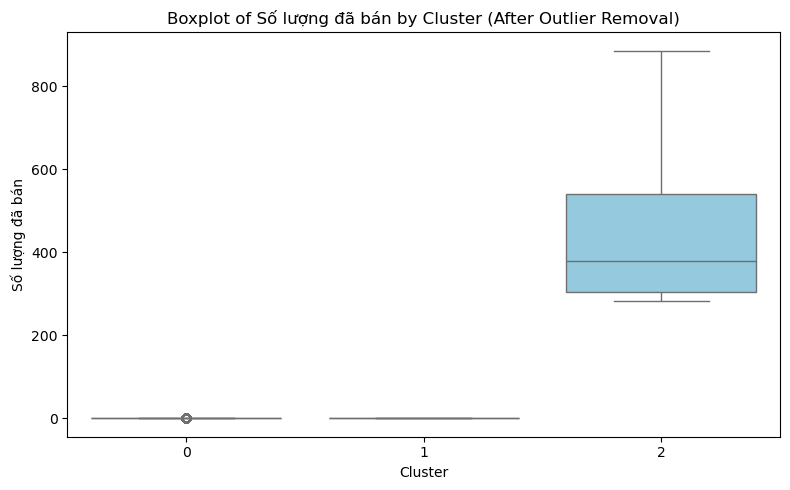

Re-clustered data saved to "./Data/reclustered_products.csv"


In [35]:
# Select relevant features for clustering
features = ['Giá', 'Lượt đánh giá', 'Số lượng đã bán']
data_filtered = filtered_data[features]

# Scale the data
scaler = StandardScaler()
data_filtered_scaled = scaler.fit_transform(data_filtered)

# Determine the optimal number of clusters (Optional: Re-run elbow method)
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data_filtered_scaled)
    inertia.append(kmeans.inertia_)

# Visualize the elbow method (Optional)
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method (Filtered Data)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Run K-Means with the chosen number of clusters (e.g., 3)
optimal_k = 3  # Choose based on elbow method
kmeans_filtered = KMeans(n_clusters=optimal_k, random_state=0)
filtered_data['Cluster'] = kmeans_filtered.fit_predict(data_filtered_scaled)

# Visualize the new clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data_filtered_scaled[:, 0], y=data_filtered_scaled[:, 1], 
    hue=filtered_data['Cluster'], palette='viridis'
)
plt.title('K-Means Clustering Visualization (After Outlier Removal)')
plt.xlabel('Scaled Price')
plt.ylabel('Scaled Rating')
plt.legend(title='Cluster')
plt.show()

# Generate Boxplots for each feature by cluster
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Cluster', y=feature, data=filtered_data, color='skyblue')
    plt.title(f'Boxplot of {feature} by Cluster (After Outlier Removal)')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Save the re-clustered data
reclustered_data_path = './Data/reclustered_products.csv'
filtered_data.to_csv(reclustered_data_path, index=False)
print(f'Re-clustered data saved to "{reclustered_data_path}"')


### **Insights from K-Means**
1. **Distinct Categories Identified**:
   - **Cluster 1**: Low-priced products with low ratings and slow sales (less popular or budget options).
   - **Cluster 2**: Medium-priced products with average ratings and sales (standard products).
   - **Cluster 3**: High-priced products with high ratings and strong sales (premium products or best-sellers).

2. **Trend Analysis**:
   - Products with higher prices often correlate with better ratings and higher sales volumes, reflecting premium quality or brand loyalty.
   - Low-priced products tend to have less engagement, suggesting they might be niche or less competitive in the market.

3. **Use Case for Segmentation**:
   - These clusters can help businesses identify product performance groups and adjust strategies for pricing, marketing, or inventory.

---

---

## **USING DBSCAN**

### **DBSCAN WITH THE DATA FIRST SCALED** 

Silhouette Score (excluding noise): 0.6459405006128928
Davies-Bouldin Index (excluding noise): 0.2688254394768476
Phân bố cụm: {np.int64(-1): np.int64(47), np.int64(0): np.int64(2895), np.int64(1): np.int64(11), np.int64(2): np.int64(5), np.int64(3): np.int64(6)}


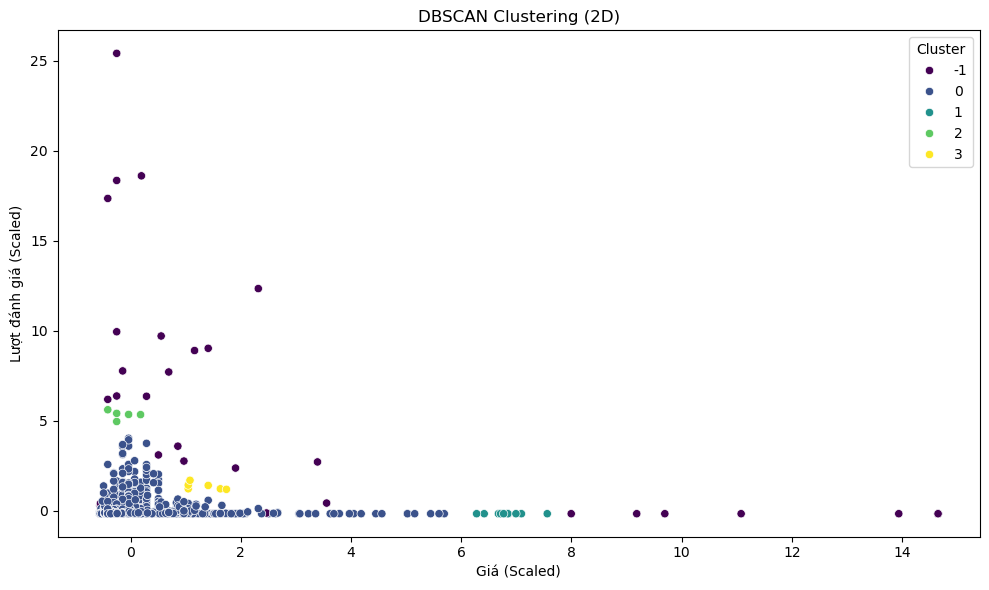

In [32]:
# Apply DBSCAN
# eps: bán kính lân cận, min_samples: số điểm tối thiểu để tạo cụm
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Thử các giá trị eps khác nhau để tối ưu
dbscan_labels = dbscan.fit_predict(data_scaled)

# Add cluster labels to the DataFrame
df['Cluster'] = dbscan_labels

# Evaluate clustering quality (ignore -1, which represents noise)
valid_clusters = dbscan_labels[dbscan_labels != -1]
if len(np.unique(valid_clusters)) > 1:  # Chỉ tính nếu có nhiều hơn 1 cụm hợp lệ
    silhouette_avg = silhouette_score(data_scaled[dbscan_labels != -1], valid_clusters)
    dbi_score = davies_bouldin_score(data_scaled[dbscan_labels != -1], valid_clusters)
    print(f"Silhouette Score (excluding noise): {silhouette_avg}")
    print(f"Davies-Bouldin Index (excluding noise): {dbi_score}")
else:
    print("DBSCAN chỉ tìm thấy 1 cụm hoặc toàn bộ là nhiễu!")

# Check cluster distribution
unique, counts = np.unique(dbscan_labels, return_counts=True)
print("Phân bố cụm:", dict(zip(unique, counts)))

# Visualize DBSCAN clustering in 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=dbscan_labels, palette='viridis')
plt.title('DBSCAN Clustering (2D)')
plt.xlabel('Giá (Scaled)')
plt.ylabel('Lượt đánh giá (Scaled)')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


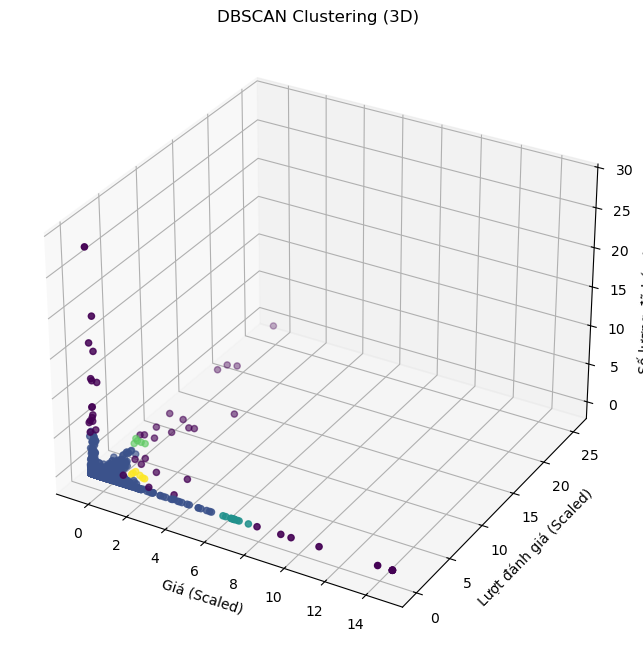

Clustered data saved to './Data/clustered_products_dbscan.csv'


In [33]:
# Visualize DBSCAN clustering in 3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_scaled[:, 0], data_scaled[:, 1], data_scaled[:, 2], c=dbscan_labels, cmap='viridis')
ax.set_title('DBSCAN Clustering (3D)')
ax.set_xlabel('Giá (Scaled)')
ax.set_ylabel('Lượt đánh giá (Scaled)')
ax.set_zlabel('Số lượng đã bán (Scaled)')
plt.show()

# Save clustered data
df.to_csv('./Data/clustered_products_dbscan.csv', index=False)
print("Clustered data saved to './Data/clustered_products_dbscan.csv'")

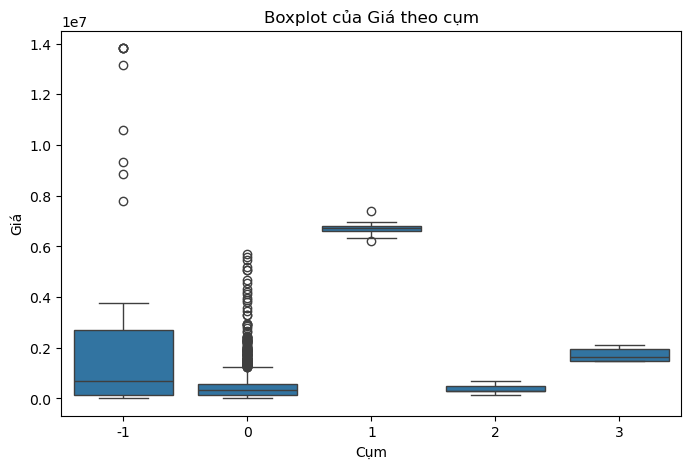

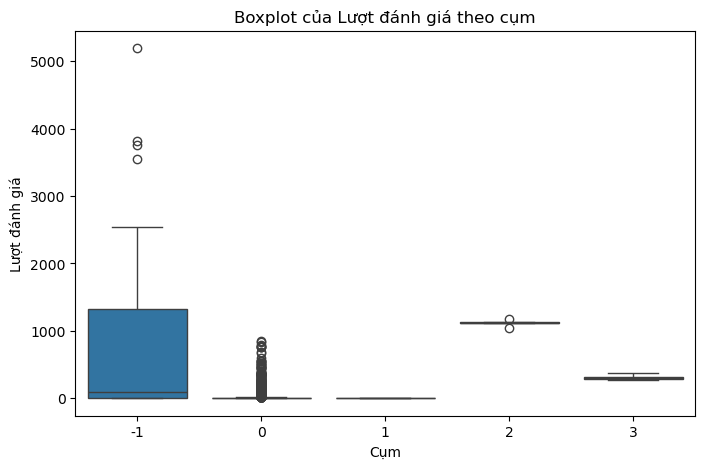

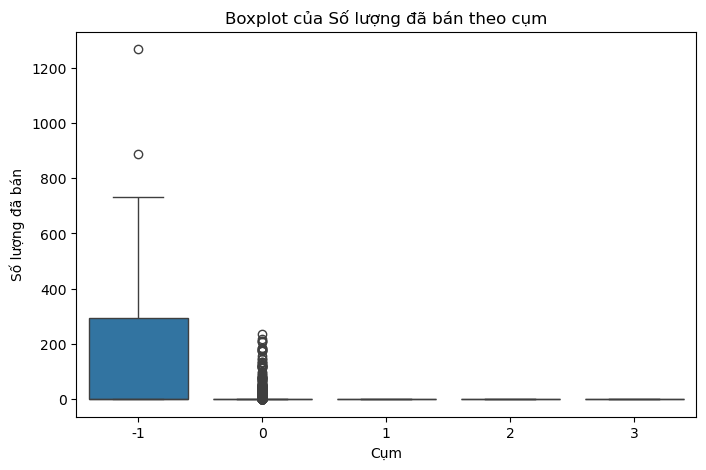

In [34]:
# Boxplot for each feature by cluster
features = ['Giá', 'Lượt đánh giá', 'Số lượng đã bán']
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Cluster', y=feature, data=df)
    plt.title(f'Boxplot của {feature} theo cụm')
    plt.xlabel('Cụm')
    plt.ylabel(feature)
    plt.show()


### **DBSCAN WITH NOISE-HANDLED DATA**

Silhouette Score (excluding noise): 0.9225296043971697
Davies-Bouldin Index (excluding noise): 0.3185361344653908
Phân bố cụm: {np.int64(-1): np.int64(39), np.int64(0): np.int64(1935), np.int64(1): np.int64(11), np.int64(2): np.int64(12)}


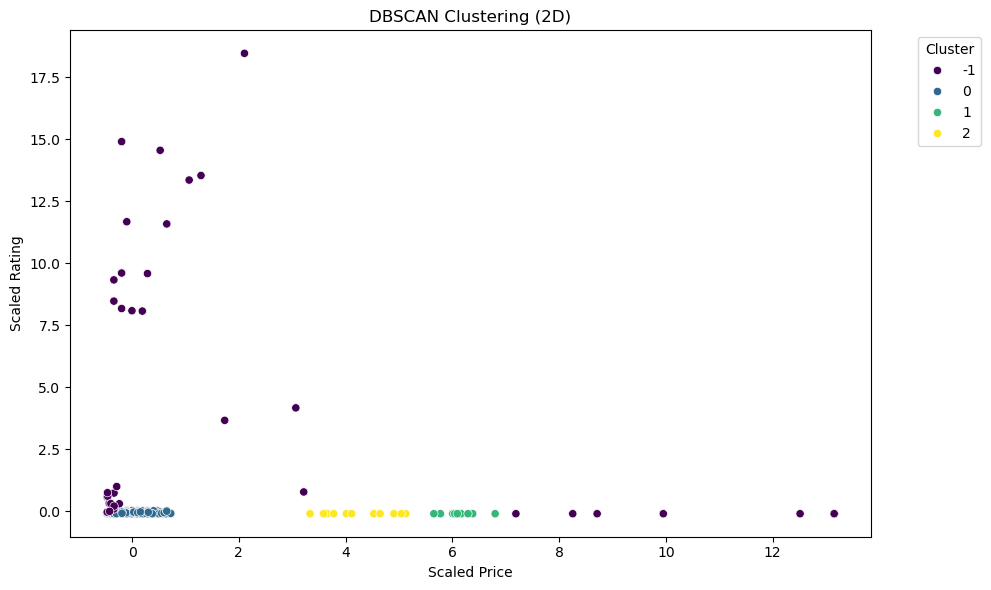

DBSCAN results saved to "./Data/dbscan_clustered_products.csv"


In [36]:
# Apply DBSCAN
# eps: bán kính lân cận, min_samples: số điểm tối thiểu để tạo cụm
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Thử các giá trị eps khác nhau để tối ưu
dbscan_labels = dbscan.fit_predict(data_filtered_scaled)

# Add DBSCAN cluster labels to the DataFrame
filtered_data['DBSCAN_Cluster'] = dbscan_labels

# Evaluate clustering quality (ignoring noise points with label -1)
valid_clusters = dbscan_labels[dbscan_labels != -1]
if len(np.unique(valid_clusters)) > 1:
    silhouette_avg = silhouette_score(data_filtered_scaled[dbscan_labels != -1], valid_clusters)
    dbi_score = davies_bouldin_score(data_filtered_scaled[dbscan_labels != -1], valid_clusters)
    print(f"Silhouette Score (excluding noise): {silhouette_avg}")
    print(f"Davies-Bouldin Index (excluding noise): {dbi_score}")
else:
    print("DBSCAN chỉ tìm thấy 1 cụm hoặc toàn bộ là nhiễu!")

# Check cluster distribution
unique, counts = np.unique(dbscan_labels, return_counts=True)
print("Phân bố cụm:", dict(zip(unique, counts)))

# Visualize DBSCAN clustering in 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data_filtered_scaled[:, 0], y=data_filtered_scaled[:, 1], 
    hue=dbscan_labels, palette='viridis', legend='full'
)
plt.title('DBSCAN Clustering (2D)')
plt.xlabel('Scaled Price')
plt.ylabel('Scaled Rating')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Save DBSCAN results
dbscan_results_path = './Data/dbscan_clustered_products.csv'
filtered_data.to_csv(dbscan_results_path, index=False)
print(f'DBSCAN results saved to "{dbscan_results_path}"')


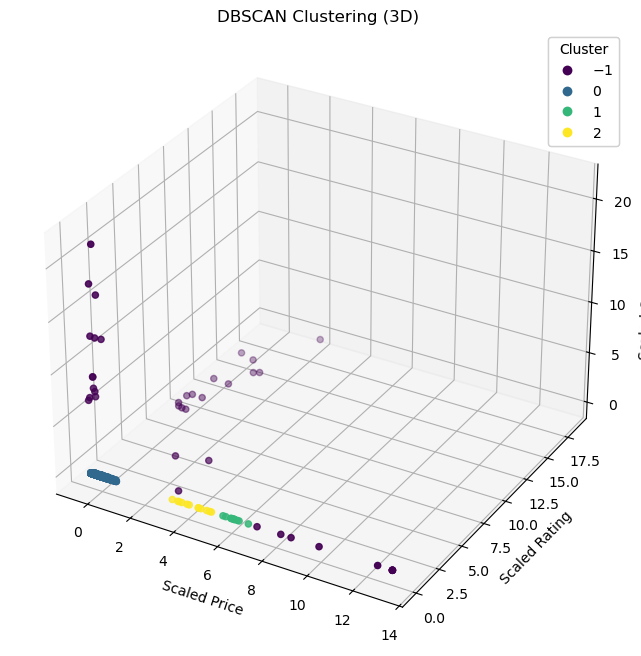

In [37]:
# Visualize DBSCAN clustering in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    data_filtered_scaled[:, 0], 
    data_filtered_scaled[:, 1], 
    data_filtered_scaled[:, 2], 
    c=filtered_data['DBSCAN_Cluster'], cmap='viridis'
)

ax.set_title('DBSCAN Clustering (3D)')
ax.set_xlabel('Scaled Price')
ax.set_ylabel('Scaled Rating')
ax.set_zlabel('Scaled Quantity Sold')

legend1 = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend1)
plt.show()

### **Insights from DBSCAN**
1. **Flexible Clustering**:
   - DBSCAN detected non-uniform clusters that were not strictly circular, making it suitable for identifying real-world product segmentation where clusters may have irregular shapes.
   - It also identified outliers (`label -1`), representing unusual or niche products that do not fit into main categories.

2. **Trend Analysis**:
   - The results reveal that some products, even at high prices, fail to achieve significant ratings or sales, indicating potential issues like overpricing or poor quality.
   - DBSCAN highlights the impact of niche products, as they often form small, dense clusters or are marked as noise points.

3. **Use Case for Segmentation**:
   - This method is highly useful for identifying outliers (e.g., unique luxury items or failed products) and clusters where traditional methods like K-Means might struggle.

---


## **Conclusion**
**Yes, we can cluster products based on price, ratings, and sales to identify distinct product categories or trends. Based on the insights derived from applying K-Means and DBSCAN:**
**Both K-Means and DBSCAN successfully cluster products into distinct categories, but each has its strengths:**

- **K-Means**: Best for general segmentation when clusters are uniform and easy to interpret.
- **DBSCAN**: More effective for complex data structures and identifying noise (niche or unusual products).

### **Actionable Steps**:
1. **For K-Means**: Use it to classify products into clear, actionable categories for strategic decisions.
2. **For DBSCAN**: Apply it to identify niche trends or anomalies that need specific attention.
3. **Combined Approach**: Use K-Means for a high-level overview and DBSCAN for deeper insights into specific product trends or anomalies.

## **References**

### **K-Means Clustering**
1. **Lloyd, S. (1982). Least squares quantization in PCM. IEEE Transactions on Information Theory, 28(2), 129-137.**
   - **Description**: This paper introduces the K-Means clustering algorithm, detailing its iterative approach to partitioning data.
   - [Link to Paper](https://ieeexplore.ieee.org/document/1056489)

2. **Scikit-Learn Documentation: K-Means**
   - **Description**: A detailed overview of the K-Means implementation in Python’s Scikit-Learn library.
   - [K-Means Scikit-Learn Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

### **DBSCAN Clustering**
1. **Ester, M., Kriegel, H. P., Sander, J., & Xu, X. (1996). A Density-Based Algorithm for Discovering Clusters in Large Spatial Databases with Noise.**
   - **Description**: The original paper introducing DBSCAN as a density-based clustering method for handling noise and discovering arbitrary-shaped clusters.
   - [Link to Paper](https://www.aaai.org/Papers/KDD/1996/KDD96-037.pdf)

2. **Scikit-Learn Documentation: DBSCAN**
   - **Description**: Comprehensive guide on implementing DBSCAN in Python’s Scikit-Learn library.
   - [DBSCAN Scikit-Learn Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)

---

### **Clustering Evaluation Metrics**
1. **Rousseeuw, P. J. (1987). Silhouettes: A graphical aid to the interpretation and validation of cluster analysis. Journal of Computational and Applied Mathematics, 20, 53-65.**
   - **Description**: Introduces the Silhouette Score as a metric for cluster evaluation.
   - [Link to Paper](https://doi.org/10.1016/0377-0427(87)90125-7)

2. **Davies, D. L., & Bouldin, D. W. (1979). A Cluster Separation Measure. IEEE Transactions on Pattern Analysis and Machine Intelligence, 1(2), 224–227.**
   - **Description**: Presents the Davies-Bouldin Index for assessing the compactness and separation of clusters.
   - [Link to Paper](https://doi.org/10.1109/TPAMI.1979.4766909)

---

### **Product Segmentation Applications**
1. **Wedel, M., & Kamakura, W. A. (2000). Market Segmentation: Conceptual and Methodological Foundations. Kluwer Academic Publishers.**
   - **Description**: Comprehensive insights into the application of clustering and segmentation in marketing.
   - [Link to Book](https://www.springer.com/gp/book/9780792377714)

---

### **Tools and Libraries Used**
1. **Scikit-Learn Official Documentation**
   - **Description**: Comprehensive reference for clustering algorithms and evaluation metrics.
   - [Scikit-Learn Documentation](https://scikit-learn.org/stable/documentation.html)

2. **Matplotlib Documentation**
   - **Description**: For plotting and visualizing clusters.
   - [Matplotlib Documentation](https://matplotlib.org/stable/contents.html)

3. **Seaborn Documentation**
   - **Description**: For enhanced visualizations, such as scatter plots and box plots.
   - [Seaborn Documentation](https://seaborn.pydata.org/)

---

### **Interquartile Range (IQR) for Outlier Removal**
1. **Tukey, J. W. (1977). Exploratory Data Analysis.**
   - Description: Introduced the concept of IQR for identifying outliers in datasets. Points outside the range `[Q1 - 1.5*IQR, Q3 + 1.5*IQR]` are considered outliers.
   - **Key Takeaways**:
     - A robust statistical method for detecting extreme values.
     - Commonly used in preprocessing to improve the quality of data for clustering algorithms.
   - [Book Reference](https://www.springer.com/gp/book/9780201076165)

2. **Practical Implementation in Python**:
   - IQR is commonly implemented using libraries like **Pandas** for preprocessing.
   - Example Documentation: [Pandas Quantile Function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html)

---
